<h1>Imports and Dataset Loading</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import recall_score,matthews_corrcoef,roc_auc_score,roc_curve,f1_score,confusion_matrix,average_precision_score,auc,precision_recall_curve
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import label_binarize

In [2]:
link="https://www.drive.google.com/uc?export=download&id=1nW2d5VHQrT59J1lV2KLnwrLM54yXEilz"
data=pd.read_csv(link)
data.head()

,Unnamed: 0,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,40000,40001,0.012996,tcp,-,FIN,16,18,1540,1644,...,1,6,0,0,0,5,7,0,Normal,0
1,40001,40002,0.004119,tcp,-,FIN,12,12,1064,2260,...,1,1,0,0,0,3,8,0,Normal,0
2,40002,40003,0.000988,udp,dns,CON,2,2,146,178,...,1,2,0,0,0,7,2,0,Normal,0
3,40003,40004,3.415787,tcp,ssh,FIN,230,238,24344,29556,...,1,1,0,0,0,4,1,0,Normal,0
4,40004,40005,0.193943,tcp,-,FIN,72,74,4238,63618,...,1,5,0,0,0,6,12,0,Normal,0


<h1>Data Analysis</h1>

In [3]:
data.drop(["Unnamed: 0",'id'],axis=1,inplace=True)
data.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.012996,tcp,-,FIN,16,18,1540,1644,2539.242797,31,...,1,6,0,0,0,5,7,0,Normal,0
1,0.004119,tcp,-,FIN,12,12,1064,2260,5583.879675,31,...,1,1,0,0,0,3,8,0,Normal,0
2,0.000988,udp,dns,CON,2,2,146,178,3036.437382,31,...,1,2,0,0,0,7,2,0,Normal,0
3,3.415787,tcp,ssh,FIN,230,238,24344,29556,136.718127,31,...,1,1,0,0,0,4,1,0,Normal,0
4,0.193943,tcp,-,FIN,72,74,4238,63618,747.642372,31,...,1,5,0,0,0,6,12,0,Normal,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135341 entries, 0 to 135340
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                135341 non-null  float64
 1   proto              135341 non-null  object 
 2   service            135341 non-null  object 
 3   state              135341 non-null  object 
 4   spkts              135341 non-null  int64  
 5   dpkts              135341 non-null  int64  
 6   sbytes             135341 non-null  int64  
 7   dbytes             135341 non-null  int64  
 8   rate               135341 non-null  float64
 9   sttl               135341 non-null  int64  
 10  dttl               135341 non-null  int64  
 11  sload              135341 non-null  float64
 12  dload              135341 non-null  float64
 13  sloss              135341 non-null  int64  
 14  dloss              135341 non-null  int64  
 15  sinpkt             135341 non-null  float64
 16  di

In [5]:
data.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,135341.000000,135341.000000,135341.000000,1.353410e+05,1.353410e+05,1.353410e+05,135341.000000,135341.000000,1.353410e+05,1.353410e+05,...,135341.000000,135341.000000,135341.000000,135341.000000,135341.000000,135341.000000,135341.000000,135341.000000,135341.000000,135341.00000
mean,1.528654,14.872699,9.732239,1.019852e+04,6.848878e+03,1.225015e+05,221.772959,93.732343,9.325885e+07,3.397422e+04,...,6.458501,5.103797,10.355125,0.013226,0.013226,0.140120,7.713841,10.188553,0.019994,0.88178
std,7.077603,151.350632,105.073620,1.988555e+05,1.367735e+05,1.792514e+05,74.479619,121.340541,2.068752e+08,4.215280e+05,...,8.729620,6.177569,11.752253,0.120535,0.120535,0.771752,9.113215,11.690950,0.139980,0.32287
min,0.000000,1.000000,0.000000,4.600000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000
25%,0.000006,2.000000,0.000000,1.140000e+02,0.000000e+00,2.720285e+01,254.000000,0.000000,9.938373e+03,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.00000
50%,0.000009,2.000000,0.000000,2.000000e+02,0.000000e+00,1.111111e+05,254.000000,0.000000,5.066666e+07,0.000000e+00,...,2.000000,1.000000,4.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.00000
75%,0.726235,10.000000,8.000000,8.840000e+02,3.540000e+02,1.428571e+05,254.000000,252.000000,9.600000e+07,3.541299e+03,...,11.000000,9.000000,17.000000,0.000000,0.000000,0.000000,14.000000,17.000000,0.000000,1.00000
max,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,252.000000,5.988000e+09,1.850500e+07,...,51.000000,31.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.00000


In [6]:
cols=['proto','service','state',"attack_cat"]
for i in cols:
  print(data[f"{i}"].unique())

['tcp' 'udp' 'arp' 'ospf' 'igmp' 'ddp' 'ipv6-frag' 'cftp' 'wsn' 'pvp'
 'wb-expak' 'mtp' 'pri-enc' 'sat-mon' 'cphb' 'sun-nd' 'iso-ip' 'xtp' 'il'
 'unas' 'mfe-nsp' '3pc' 'ipv6-route' 'idrp' 'bna' 'swipe' 'kryptolan'
 'cpnx' 'rsvp' 'wb-mon' 'vmtp' 'ib' 'dgp' 'eigrp' 'ax.25' 'gmtp' 'pnni'
 'sep' 'pgm' 'idpr-cmtp' 'zero' 'rvd' 'mobile' 'narp' 'fc' 'pipe' 'ipcomp'
 'ipv6-no' 'sat-expak' 'ipv6-opts' 'snp' 'ipcv' 'br-sat-mon' 'ttp' 'tcf'
 'nsfnet-igp' 'sprite-rpc' 'aes-sp3-d' 'sccopmce' 'sctp' 'qnx' 'scps'
 'etherip' 'aris' 'pim' 'compaq-peer' 'vrrp' 'iatp' 'stp' 'l2tp' 'srp'
 'sm' 'isis' 'smp' 'fire' 'ptp' 'crtp' 'sps' 'merit-inp' 'idpr' 'skip'
 'any' 'larp' 'ipip' 'micp' 'encap' 'ifmp' 'tp++' 'a/n' 'ipv6' 'i-nlsp'
 'ipx-n-ip' 'sdrp' 'tlsp' 'gre' 'mhrp' 'ddx' 'ippc' 'visa' 'secure-vmtp'
 'uti' 'vines' 'crudp' 'iplt' 'ggp' 'ip' 'ipnip' 'st2' 'argus' 'bbn-rcc'
 'egp' 'emcon' 'igp' 'nvp' 'pup' 'xnet' 'chaos' 'mux' 'dcn' 'hmp' 'prm'
 'trunk-1' 'xns-idp' 'leaf-1' 'leaf-2' 'rdp' 'irtp' 'iso-tp4' 'n

In [7]:
X=data.drop("attack_cat",axis=1)
y=data["attack_cat"]
cols.remove("attack_cat")
X=pd.concat([X.drop(cols,axis=1),pd.get_dummies(X)],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

<h1>Model Training</h1>

In [8]:
X.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,0.012996,16,18,1540,1644,2539.242797,31,29,8.888889e+05,9.559864e+05,...,False,False,False,False,False,False,True,False,False,False
1,0.004119,12,12,1064,2260,5583.879675,31,29,1.895606e+06,4.024278e+06,...,False,False,False,False,False,False,True,False,False,False
2,0.000988,2,2,146,178,3036.437382,31,29,5.910931e+05,7.206478e+05,...,False,False,False,False,False,True,False,False,False,False
3,3.415787,230,238,24344,29556,136.718127,31,29,5.676935e+04,6.893170e+04,...,False,False,False,True,False,False,True,False,False,False
4,0.193943,72,74,4238,63618,747.642372,31,29,1.724218e+05,2.588761e+06,...,False,False,False,False,False,False,True,False,False,False


In [9]:
model=DecisionTreeClassifier(max_depth=10)#I took the best hyperparameters from a friend because I wasn't able to use RandomizedGridSearchCV or GridSearchCV
model.fit(X_train,y_train)
best_model=model

<h1>Model Evaluation</h1>

##F1 Score

In [10]:
predictions=best_model.predict(X_test)
f1_macro=f1_score(y_test,predictions,average='macro')
f1_micro=f1_score(y_test,predictions,average='micro')
f1_weighted=f1_score(y_test,predictions,average='weighted')
print(f"F1 Score Macro: {f1_macro}")
print(f"F1 Score Micro: {f1_micro}")
print(f"F1 Score Weighted: {f1_weighted}")

F1 Score Macro: 0.570449603445111
F1 Score Micro: 0.81979386013521
F1 Score Weighted: 0.7876775340340122


##AUC Scores

AUC Scores (One vs Rest strategy)
Class Fuzzers AUC: 0.45
Class Normal AUC: 0.26
Class Exploits AUC: 0.81
Class Generic AUC: 0.1
Class DoS AUC: 0.71
Class Reconnaissance AUC: 0.2
Class Analysis AUC: 0.44
Class Backdoor AUC: 0.73
Class Shellcode AUC: 0.99
Class Worms AUC: 0.93


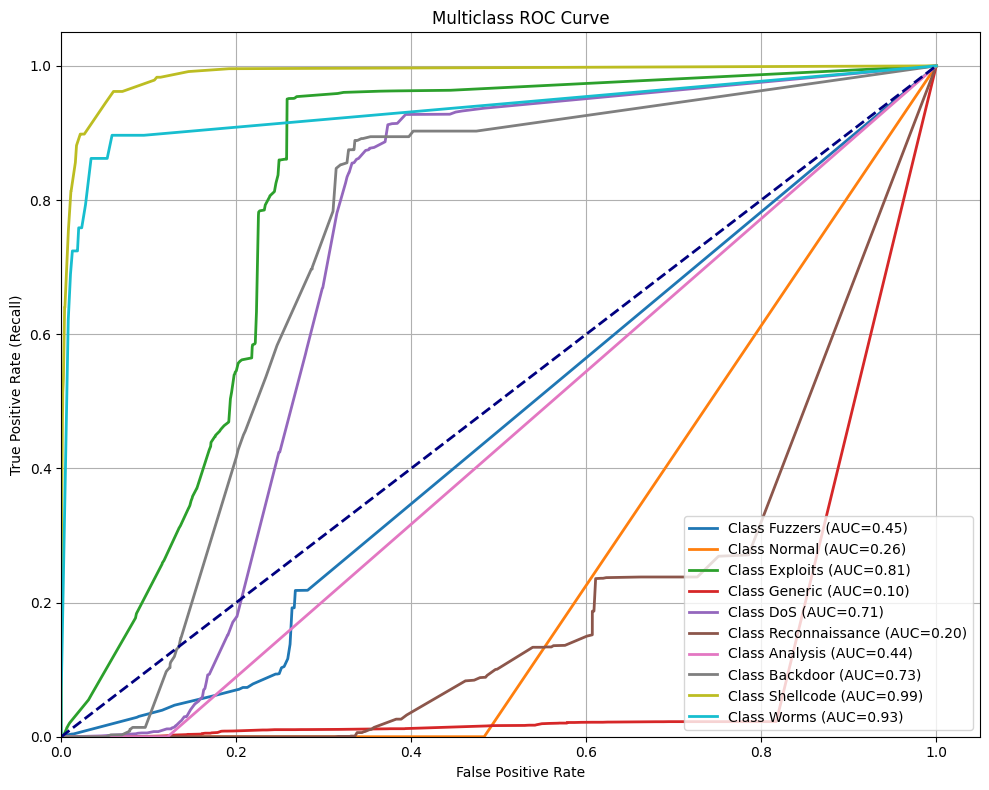

In [11]:
y_test_binarized=label_binarize(y_test,classes=y_test.unique())
y_pred_probabilities=best_model.predict_proba(X_test)
auc_scores=dict()
for i in range(y_test_binarized.shape[1]):
  auc_scores[f'Class {y_test.unique()[i]} AUC']=roc_auc_score(y_test_binarized[:,i],y_pred_probabilities[:,i])
print("AUC Scores (One vs Rest strategy)")
for class_label,auc_score in auc_scores.items():
  print(f"{class_label}: {auc_score:.2}")
fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(10,8))
for i in range(y_test_binarized.shape[1]):
  fpr[i],tpr[i],_=roc_curve(y_test_binarized[:,i],y_pred_probabilities[:,i])
  roc_auc[i]=auc(fpr[i],tpr[i])
  plt.plot(fpr[i],tpr[i],lw=2,label=f'Class {y_test.unique()[i]} (AUC={roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

The tree is very good at identifying Worms, Shellcodes, Fuzzers and DoS. The low recall for Normal is acceptable in Cyber Security situations. It has a hard time with Generic attacks alongwith Analysis and Reconnaissance type of missions

##Confusion Matrix

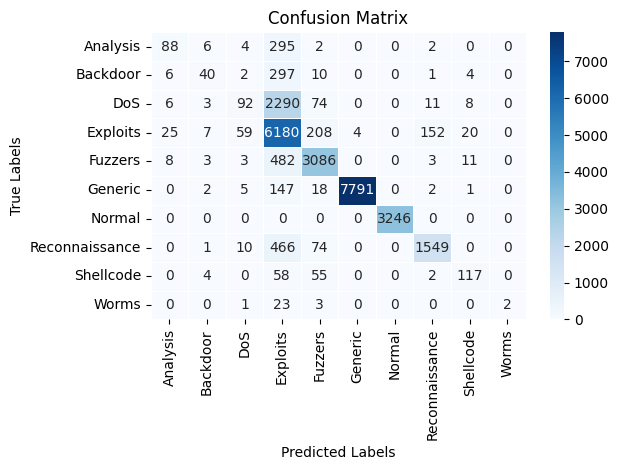

In [12]:
y_pred=best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, linewidth=0.5,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

##Precision Recall Curve

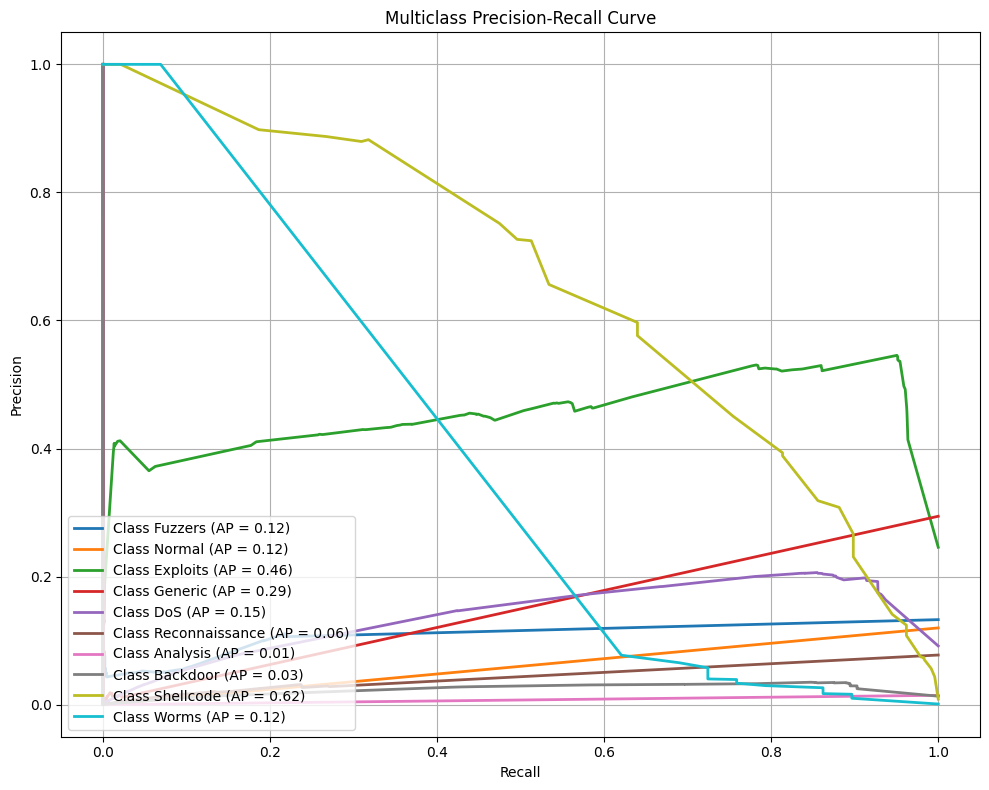

In [13]:
plt.figure(figsize=(10, 8))
for i in range(y_test_binarized.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_probabilities[:, i])
    avg_precision = average_precision_score(y_test_binarized[:, i], y_pred_probabilities[:, i])
    plt.plot(recall, precision, lw=2, label=f'Class {y_test.unique()[i]} (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multiclass Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()

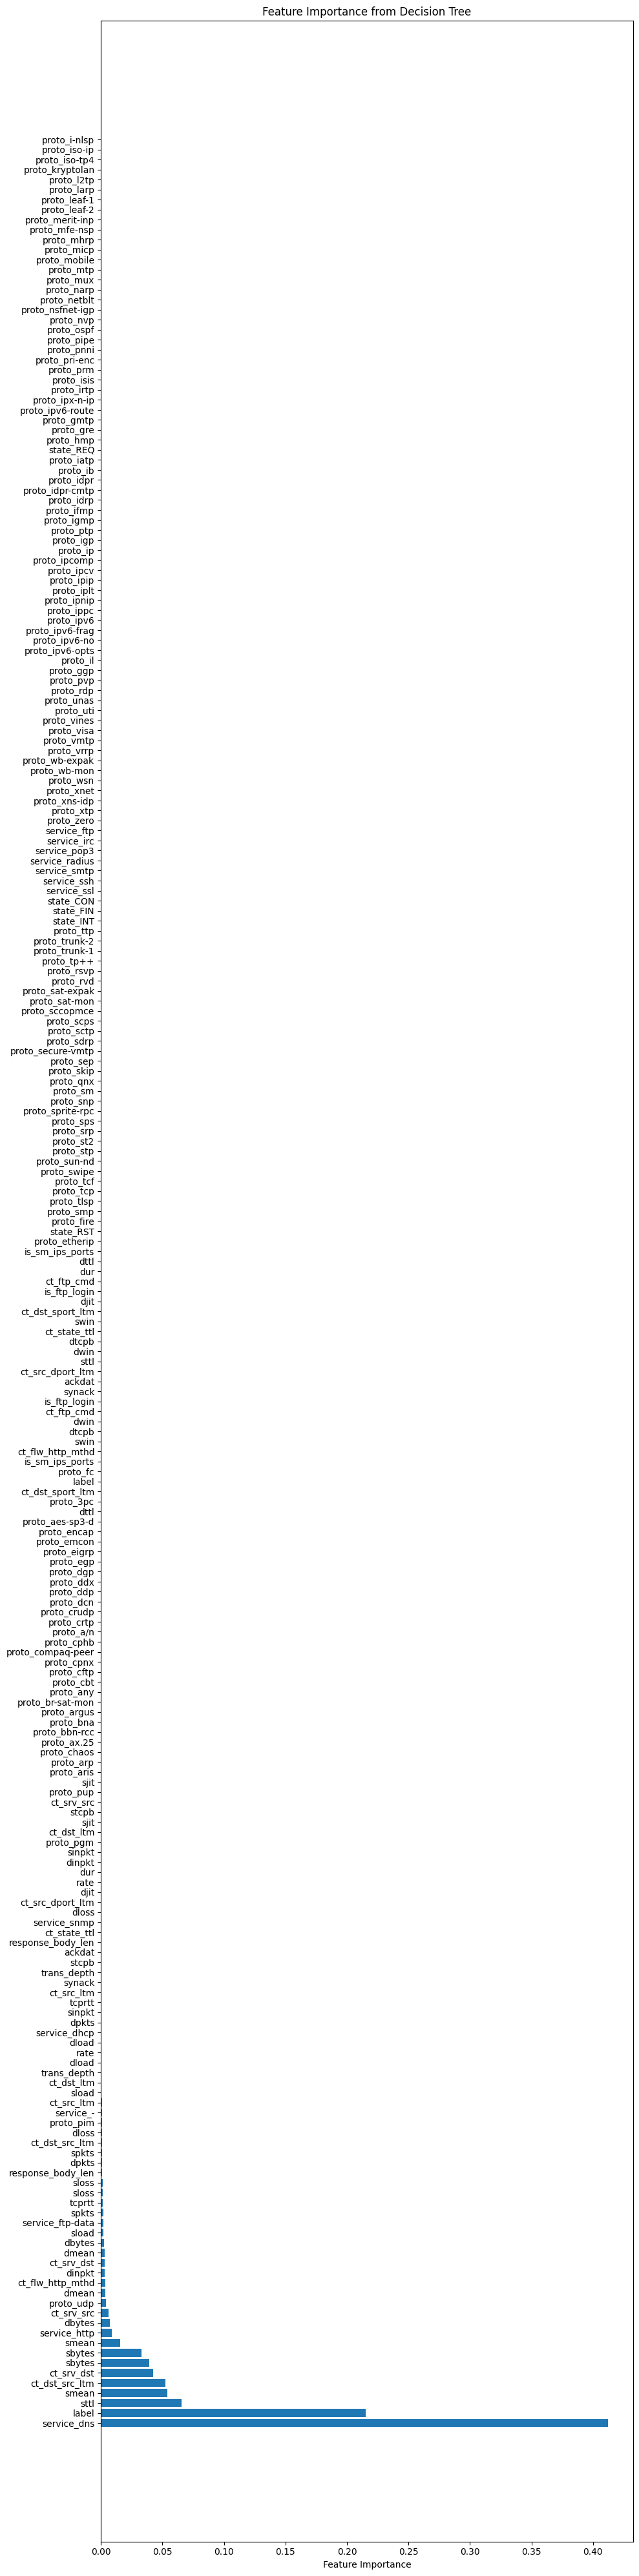

In [14]:
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 40))
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), np.array(X_test.columns)[indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Decision Tree')
plt.tight_layout()
plt.show()

#Accuracy

In [15]:
print(f"Accuracy: {np.mean(y_test==y_pred)}")

Accuracy: 0.81979386013521


#Visualising and Saving the Tree

In [16]:
dot_data = export_graphviz(best_model, out_file=None,
                           feature_names=X_train.columns,
                           class_names=y_train.unique(),
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree", view=True)

'decision_tree.pdf'

In [17]:
data['attack_cat'].value_counts()

,count
attack_cat,
Generic,40000
Exploits,33393
Fuzzers,18184
Normal,16000
DoS,12264
Reconnaissance,10491
Analysis,2000
Backdoor,1746
Shellcode,1133
